In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_final_demo = pd.read_csv("df_final_demo.txt")
df_exp_cli = pd.read_csv("df_final_experiment_clients.txt")
df_web_1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_web_2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [4]:
df_final_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
df_final_demo.shape

(70609, 9)

In [6]:
df_exp_cli.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [7]:
df_exp_cli.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [8]:
df_exp_cli.shape

(70609, 2)

In [9]:
df_web_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [10]:
df_web_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [11]:
df_web = pd.concat([df_web_1, df_web_2], axis=0)
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [12]:
df_web['date_time'] = pd.to_datetime(df_web['date_time'], errors='coerce')

In [13]:
df = pd.merge(df_final_demo, df_exp_cli, on ='client_id',how='outer')
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [14]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [15]:
df.shape

(70609, 10)

In [16]:
df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [17]:
df['clnt_tenure_yr'].unique()

array([21.,  3., 12., 11.,  9.,  5.,  8.,  7., 48., 14., 19., 23., 13.,
        4., 15.,  6., 16., 30., 27., 18., 20., 22., 17., 10., 24., 26.,
       25., 28., 29., 43., 32., 31., 34., 36., 55., 33., 35.,  2., 51.,
       37., 38., nan, 62., 40., 45., 39., 50., 52., 47., 44., 42., 41.,
       46., 54., 49.])

In [18]:
np.sort(df['clnt_tenure_yr'].unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 54.,
       55., 62., nan])

In [19]:
df['clnt_tenure_yr'] = df['clnt_tenure_yr'].astype('Int64')

In [20]:
df['clnt_tenure_mnth'].unique()

array([262.,  46., 151., 143., 109., 145.,  66.,  99.,  85., 576., 177.,
        60., 150., 139., 229., 280., 260., 110., 157.,  98.,  63., 179.,
       231., 142.,  58., 117., 116., 189., 190.,  75.,  94., 172., 199.,
       154.,  86.,  77., 253., 361.,  57., 173.,  92., 329.,  72.,  81.,
       149., 155.,  89., 195., 141., 106., 252., 218., 364., 140., 241.,
       257., 226., 269., 170., 164.,  78., 108.,  56., 105.,  88., 211.,
       205.,  73., 194.,  69., 171., 126.,  71.,  83., 121., 299., 156.,
       285., 191., 321., 200.,  55.,  76., 242., 281., 294., 224., 166.,
        70., 304.,  65., 169., 264., 230., 222., 160., 192.,  74.,  84.,
        82., 168., 124., 119., 342., 219., 163., 144., 193., 131., 118.,
       158.,  87., 186., 107., 196.,  91., 277., 125., 122., 259., 178.,
       123., 310., 181., 232., 352., 214., 114., 250., 101.,  59., 345.,
       282.,  80., 129.,  68., 184., 174., 268., 246., 176., 183.,  95.,
        48., 255., 215., 100., 298., 187., 355., 31

In [21]:
df['clnt_tenure_mnth'] = df['clnt_tenure_mnth'].astype('Int64')

In [22]:
df['clnt_age'].unique()

array([47.5, 29.5, 57.5, 59.5, 51. , 36. , 48. , 22. , 54.5, 28.5, 42. ,
       46. , 45. , 58.5, 51.5, 55. , 43. , 62.5, 46.5, 37.5, 26.5, 63.5,
       56. , 25. , 52. , 63. , 30. , 70.5, 48.5, 38.5, 58. , 40. , 65.5,
       64.5, 50.5, 40.5, 29. , 76. , 25.5, 67. , 35.5, 53. , 61.5, 41.5,
       33. , 44. , 50. , 30.5, 55.5, 34. , 27. , 22.5, 38. , 36.5, 82. ,
       26. , 74. , 23. , 31.5, 60. , 53.5, 28. , 37. , 39. , 27.5, 77.5,
       52.5, 19.5, 62. , 34.5, 69. , 54. , 45.5, 65. , 21. , 20. , 60.5,
       74.5, 68. , 61. , 41. , 43.5, 75.5, 49.5, 32. , 67.5, 19. , 49. ,
       23.5, 33.5, 24. , 76.5, 71. , 59. , 15.5, 69.5, 56.5, 66. , 32.5,
       42.5, 57. , 47. , 81.5, 31. , 44.5, 71.5, 70. , 24.5, 75. , 77. ,
       81. , 14.5, 86.5, 73. , 39.5, 73.5, 79.5, 21.5, 85. , 35. , 80. ,
       72.5, 78. , 18.5, 64. , 68.5, 66.5, 84. , 72. , 20.5, 83. , 91. ,
       83.5, 16.5, 18. , 95.5, 82.5, 16. , 17. , 17.5, 80.5, 84.5, 78.5,
       92. , 79. , 89. ,  nan, 15. , 90. , 86. , 87

In [23]:
df['num_accts'].unique()

array([ 2.,  3.,  5.,  4.,  6.,  8., nan,  7.,  1.])

In [24]:
df['num_accts'] = df['num_accts'].astype('Int64')

In [25]:
df['calls_6_mnth'].unique()

array([ 4.,  2.,  0.,  1.,  6.,  5.,  3.,  7., nan])

In [26]:
df['calls_6_mnth'] = df['calls_6_mnth'].astype('Int64')

In [27]:
df['logons_6_mnth'].unique()

array([ 4.,  6.,  1.,  3.,  9.,  5.,  8.,  7.,  2., nan])

In [28]:
df['logons_6_mnth'] = df['logons_6_mnth'].astype('Int64')

In [29]:
df.columns = df.columns.str.lower()

In [30]:
df['gendr'].unique()

array(['M', 'U', 'F', nan, 'X'], dtype=object)

In [31]:
df.duplicated().sum()

0

In [32]:
df['gendr'] = df['gendr'].fillna('U')

In [33]:
df['variation'] = df['variation'].fillna('no_experiment')

In [34]:
df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
variation            0
dtype: int64

In [35]:
df['clnt_age'] = df['clnt_age'].fillna(df['clnt_age'].mean())

In [36]:
df.dropna(subset=['num_accts'], inplace=True)

### ¿Quienes son los principales clientes que utilizan este proceso en linea?

In [37]:
# Primero queremos saber que cantidad de gente ha tomado el test.
frequency_table = df['variation'].value_counts()
frequency_table = frequency_table.loc[['Test', 'Control']]

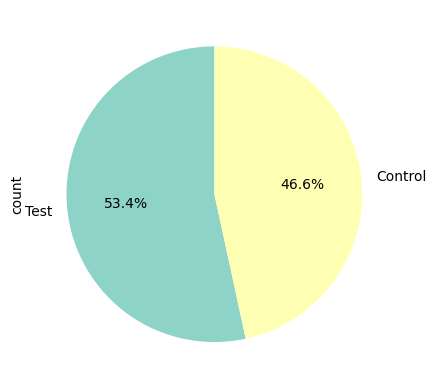

In [38]:
frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\1961423030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")


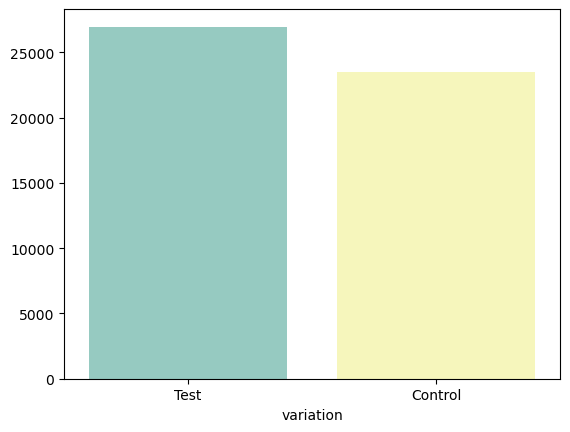

In [39]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")
plt.show()

### ¿Son más bien jóvenes o mayores?

In [44]:
df['clnt_age'].describe()

count    70595.000000
mean        46.442240
std         15.591162
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

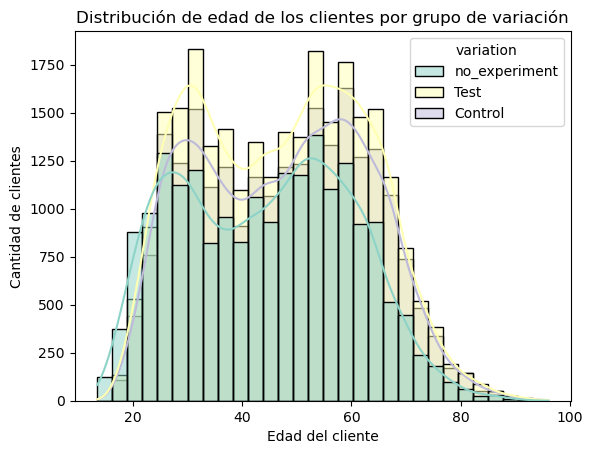

In [46]:
sns.histplot(data=df, x='clnt_age', hue='variation', kde=True, bins=30, palette="Set3")
plt.title('Distribución de edad de los clientes por grupo de variación')
plt.xlabel('Edad del cliente')
plt.ylabel('Cantidad de clientes')
plt.show()

Desde los 20 años en adelante, hay una base sólida de usuarios. Esto sugiere que la plataforma online está siendo usada activamente por adultos jóvenes en adelante.

Primer pico en los 30s (~35 años):
Probablemente representa a clientes que ya han comenzado a ahorrar/invertir activamente y están cómodos usando herramientas digitales.

Segundo pico en los 50s (~57 años):
Personas en etapa más avanzada de su carrera profesional. Probablemente con más patrimonio y uso activo de servicios financieros, pero también digitalmente competentes.

C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\1942034299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='variation', y='clnt_age',palette="Set3")


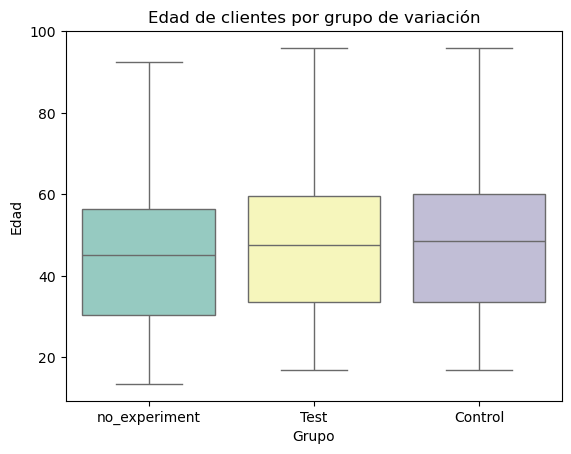

In [48]:
sns.boxplot(data=df, x='variation', y='clnt_age',palette="Set3")
plt.title('Edad de clientes por grupo de variación')
plt.xlabel('Grupo')
plt.ylabel('Edad')
plt.show()

Los de test y los de control tienen edades similares.

Resumen: 

La mayoría de los clientes que usan el proceso online tienen más de 20 años, con dos grupos destacados alrededor de los 35 y 57 años. Esto indica que tanto adultos jóvenes como clientes de mediana edad son los principales usuarios del proceso digital.

### ¿Clientes nuevos o con más antigüedad?

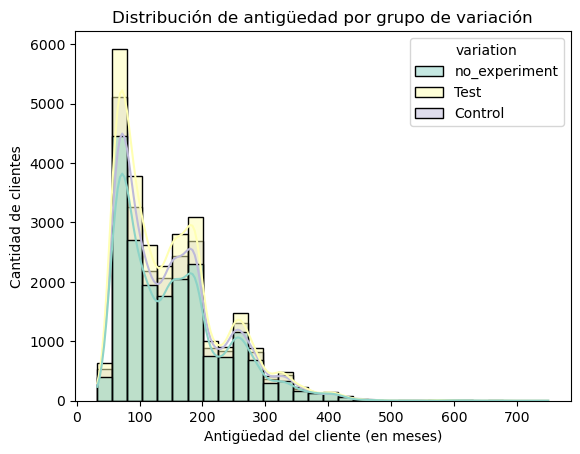

In [50]:
sns.histplot(data=df, x='clnt_tenure_mnth', hue='variation', kde=True, bins=30, palette='Set3')
plt.title('Distribución de antigüedad por grupo de variación')
plt.xlabel('Antigüedad del cliente (en meses)')
plt.ylabel('Cantidad de clientes')
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\1487374077.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='variation', y='clnt_tenure_mnth', palette='Set3')


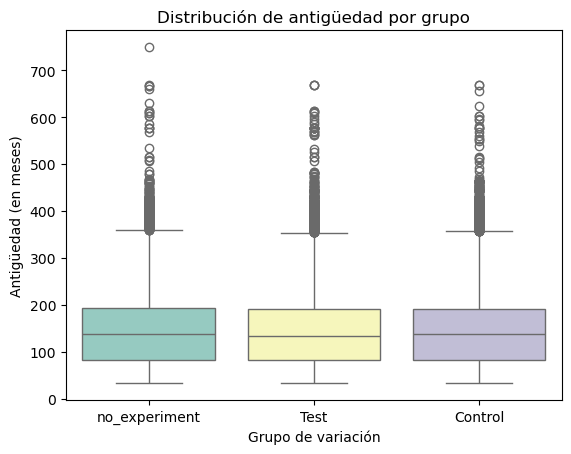

In [51]:
sns.boxplot(data=df, x='variation', y='clnt_tenure_mnth', palette='Set3')
plt.title('Distribución de antigüedad por grupo')
plt.xlabel('Grupo de variación')
plt.ylabel('Antigüedad (en meses)')
plt.show()

La antigüedad se mide en meses, y la mayoría de los clientes tienen entre 50 y 80 meses (aproximadamente 4 a 6.5 años), donde se observa el pico más alto con cerca de 6000 clientes.

Existe un segundo pico menos pronunciado entre 175 y 200 meses (14.5 a 16.5 años), ceerca de 3000 clientes.

El rango intercuartílico (IQR) de antigüedad — es decir, el 50% central de los clientes — se encuentra entre 100 y 200 meses (aproximadamente 8 a 16 años).

Esto indica que la mayoría de los clientes tienen una antigüedad media a alta, aunque también hay clientes con antiguedades mucho más altas que se consideran outliers en la distribución.

La presencia de estos dos picos y el rango concentrado sugiere que tanto clientes relativamente nuevos como clientes con una larga trayectoria están activos en el proceso online, con una mayor concentración en rangos medios y altos de antigüedad, teniendo en cuenta que interpretamos que 4 años es medio alto.

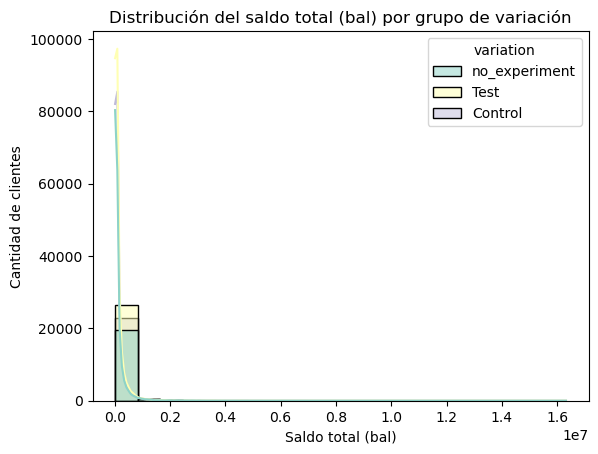

In [53]:
sns.histplot(data=df, x='bal', hue='variation', bins=20, palette='Set3', kde=True)
plt.title('Distribución del saldo total (bal) por grupo de variación')
plt.xlabel('Saldo total (bal)')
plt.ylabel('Cantidad de clientes')
plt.show()

C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\266369444.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='variation', y='bal', palette='Set3')


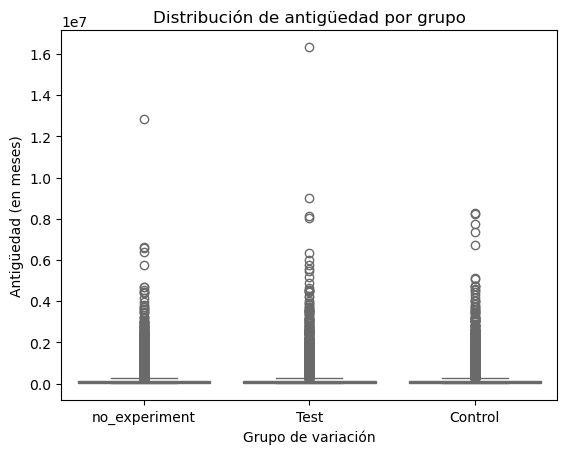

In [55]:
sns.boxplot(data=df, x='variation', y='bal', palette='Set3')
plt.title('Distribución de antigüedad por grupo')
plt.xlabel('Grupo de variación')
plt.ylabel('Antigüedad (en meses)')
plt.show()

In [ ]:
df.groupby('variation')['bal'].describe()

,count,mean,std,min,25%,50%,75%,max
variation,,,,,,,,
Control,23527.0,150147.326660,295806.950360,23789.61,40123.355,66024.18,140606.045,8292996.21
Test,26961.0,148962.605032,307373.713775,23789.44,39729.200,65468.36,139478.580,16320040.15
no_experiment,20107.0,142248.958795,300124.151719,13789.42,30147.715,56338.10,130512.655,12838418.01


La mayoría de los clientes tienen saldos bajos, concentrados por debajo de 140,000, con un gran pico en el histograma entre 0 y 20,000, lo que sugiere que muchos clientes tienen cuentas pequeñas.

El IQR (25%–75%) en todos los grupos se encuentra entre aproximadamente 30,000 y 140,000, mostrando que la mayoría de los clientes se mueve dentro de ese rango de saldo.

Sin embargo, existen outliers muy extremos con saldos millonarios, lo que genera una alta desviación estándar y una gran diferencia entre la media y la mediana.

La mayoría de los clientes tienen saldos pequeños, concentrados por debajo de 200 mil. Sin embargo, existen clientes con saldos muy altos que aparecen como outliers, y estos están presentes en distintos grupos del experimento. Esto podría influir en los resultados si no se controla adecuadamente, por lo que conviene considerar análisis complementarios con y sin estos outliers.

In [59]:
# Calcular Q1 y Q3
Q1 = df['bal'].quantile(0.25)
Q3 = df['bal'].quantile(0.75)
IQR = Q3 - Q1

# Definir el umbral superior para outliers
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame sin outliers
df_bal_clean = df[df['bal'] <= upper_bound]

# Ver describe() sin outliers
df_bal_clean.groupby('variation')['bal'].describe()

,count,mean,std,min,25%,50%,75%,max
variation,,,,,,,,
Control,20780.0,80309.823968,58259.460480,23789.61,37864.4975,58422.115,103310.0475,287831.43
Test,23938.0,80648.496650,59330.513978,23789.44,37646.6225,57708.025,103820.8200,287696.13
no_experiment,17859.0,72180.509917,61148.709492,13789.42,28024.6300,48871.850,94986.7600,287813.68


C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\3296951042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bal_clean, x='variation', y='bal', palette='Set3')


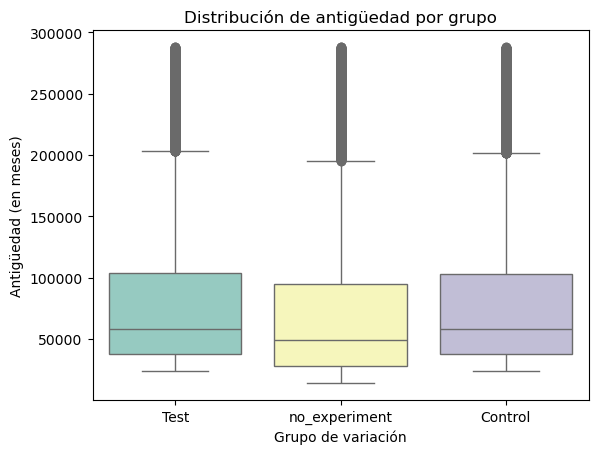

In [60]:
sns.boxplot(data=df_bal_clean, x='variation', y='bal', palette='Set3')
plt.title('Distribución de antigüedad por grupo')
plt.xlabel('Grupo de variación')
plt.ylabel('Antigüedad (en meses)')
plt.show()

Las medias bajan significativamente respecto al análisis con outliers (antes rondaban los 140–150k), lo que confirma que había valores extremos inflando el promedio.

Ahora la media y la mediana están más cercanas, lo cual indica una distribución más equilibrada.

Test y Control siguen muy parejos en valores medios, lo que sugiere un reparto equitativo de los clientes por saldo en el experimento.

El grupo no_experiment tiene valores algo más bajos tanto en media como mediana, lo cual podría indicar un perfil de cliente diferente (menos consolidado o más nuevo).

## KPI

### #1: Completion Rate

In [65]:
df_web_v = pd.merge(df_web, df_exp_cli, on ='client_id',how='outer')
df_web_v.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,NaN
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,NaN
3,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,NaN
4,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaN


In [67]:
df_web_v['Variation'] = df_web_v['Variation'].fillna('no_experiment')

In [75]:
completed = df_web_v[df_web_v['process_step'] == 'confirm'][['client_id', 'Variation']].drop_duplicates()
completed

,client_id,Variation
0,169,no_experiment
7,546,no_experiment
12,555,Test
17,647,Test
22,722,no_experiment
...,...,...
755359,9999451,no_experiment
755374,9999729,Test
755379,9999768,no_experiment
755393,9999839,no_experiment


In [79]:
total_clients = df_web_v[['client_id', 'Variation']].drop_duplicates().groupby('Variation').count()
total_clients

,client_id
Variation,
Control,23532
Test,26968
no_experiment,69657


In [82]:
completed_clients = completed.groupby('Variation').count()
completed_clients

,client_id
Variation,
Control,15434
Test,18687
no_experiment,47024


In [88]:
completion_rate = (completed_clients / total_clients)*100
completion_rate = completion_rate.round(2)
completion_rate

,client_id
Variation,
Control,65.59
Test,69.29
no_experiment,67.51


C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\1299123976.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=completion_rate, x='Variation', y='client_id', palette='Set2')


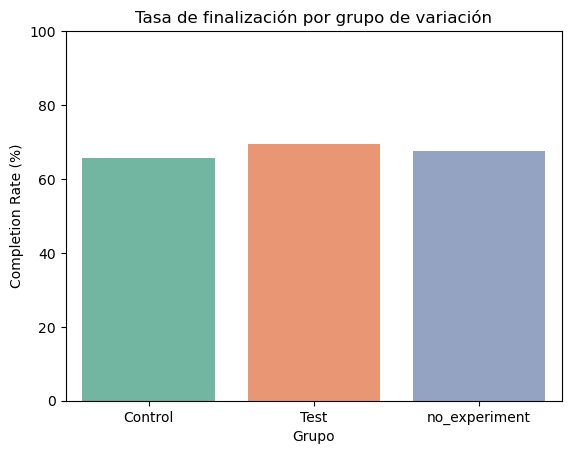

In [91]:
sns.barplot(data=completion_rate, x='Variation', y='client_id', palette='Set2')
plt.title('Tasa de finalización por grupo de variación')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Grupo')
plt.ylim(0, 100)
plt.show()

Insights para Completion Rate


El grupo Test presenta una tasa de finalización del 69.29%, ligeramente superior al 65.59% del grupo Control y al 67.51% del grupo no_experiment.

La diferencia es pequeña (menos de 4 puntos porcentuales).

Esta diferencia, aunque moderada en porcentaje, representa unos miles de clientes adicionales que completaron el proceso gracias al nuevo diseño.

La mejora en el grupo Test frente a Control y no_experiment sugiere que la nueva interfaz puede tener un impacto positivo (moderado) en la experiencia y comportamiento de los clientes.

Es importante considerar también otros KPIs para tener una visión más completa del impacto del cambio digital.

### Tiempo invertido en cada paso del proceso.

In [94]:
df_web_sorted = df_web_v.sort_values(by=['client_id', 'visit_id', 'date_time'])

df_web_sorted['time_diff'] = df_web_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

avg_time_per_step = df_web_sorted.groupby(['Variation', 'process_step'])['time_diff'].mean().unstack()
print(avg_time_per_step)

process_step      confirm       start     step_1     step_2      step_3
Variation                                                              
Control        128.664715  151.366026  42.998741  38.667857   92.944258
Test           128.769658  147.140325  37.704369  48.131611   96.850972
no_experiment  131.730524  141.097140  39.105145  47.282392  102.793825


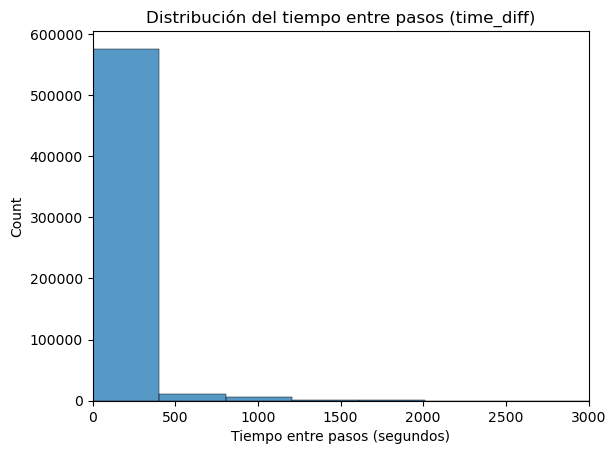

In [95]:
sns.histplot(df_web_sorted['time_diff'], bins=100, kde=False)
plt.xlim(0, 3000)  # limitar a 3000 segundos (~50 minutos) para visualizar mejor
plt.title("Distribución del tiempo entre pasos (time_diff)")
plt.xlabel("Tiempo entre pasos (segundos)")
plt.show()

In [98]:
resumen = df_web_sorted.groupby('process_step')['time_diff'] \
             .describe()[['count','mean','std','50%','min','max']]
print(resumen)

                 count        mean         std   50%  min      max
process_step                                                      
confirm        92625.0  130.462543  276.523518  59.0  0.0  35680.0
start          98714.0  144.268057  361.653644  49.0  0.0  40235.0
step_1        161570.0   39.479879  102.166102  12.0  0.0   4150.0
step_2        132364.0   45.802816   95.256210  23.0  0.0   2393.0
step_3        111020.0   99.415078  130.804609  67.0  0.0   3635.0


C:\Users\rocio\AppData\Local\Temp\ipykernel_23920\3633923762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_web_sorted, x='process_step', y='time_diff', palette='Set3')


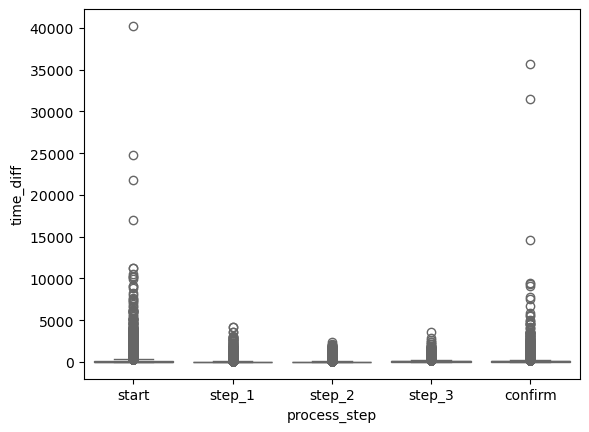

In [99]:
sns.boxplot(data=df_web_sorted, x='process_step', y='time_diff', palette='Set3')
plt.show()

In [101]:
grouped = df_web_sorted.groupby('process_step')['time_diff']

# Moda
mode = grouped.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Varianza
variance = grouped.var()

# IQR
q75 = grouped.quantile(0.75)
q25 = grouped.quantile(0.25)
iqr = q75 - q25

# Rango
rango = grouped.max() - grouped.min()

# Juntamos todo en un DataFrame
resumen = pd.DataFrame({
    'mode': mode,
    'variance': variance,
    'IQR': iqr,
    'rango': rango
})

In [102]:
resumen

,mode,variance,IQR,rango
process_step,,,,
confirm,22.0,76465.255768,94.0,35680.0
start,0.0,130793.358422,126.0,40235.0
step_1,4.0,10437.912465,24.0,4150.0
step_2,7.0,9073.745454,34.0,2393.0
step_3,47.0,17109.845831,73.0,3635.0


In [104]:
# Calcular Q1 y Q3
Q1 = df_web_sorted['time_diff'].quantile(0.25)
Q3 = df_web_sorted['time_diff'].quantile(0.75)
IQR = Q3 - Q1

# Definir el umbral superior para outliers
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame sin outliers
df_time_clean = df_web_sorted[df_web_sorted['time_diff'] <= upper_bound]

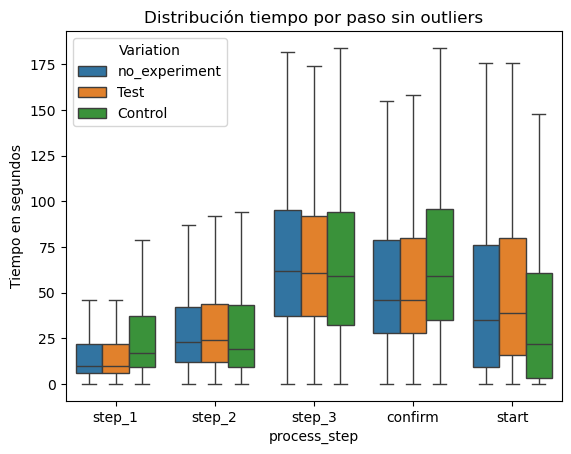

In [105]:
sns.boxplot(data=df_time_clean, x='process_step', y='time_diff', hue='Variation', showfliers=False)
plt.title('Distribución tiempo por paso sin outliers')
plt.ylabel('Tiempo en segundos')
plt.show()

In [ ]:
q1 = df_time_clean.groupby(['Variation', 'process_step'])['time_diff'].quantile(0.25)
q3 = df_time_clean.groupby(['Variation', 'process_step'])['time_diff'].quantile(0.75)
iqr = q3 - q1
kpis = pd.DataFrame({
    'median': df_time_clean.groupby(['Variation', 'process_step'])['time_diff'].median(),
    'mode': df_time_clean.groupby(['Variation', 'process_step'])['time_diff'].agg(lambda x: x.mode().iloc[0]),
    'IQR': iqr
})
kpis

median  mode   IQR
Variation     process_step                    
Control       confirm         59.0   0.0  61.0
              start           22.0   0.0  58.0
              step_1          17.0   4.0  28.0
              step_2          19.0   6.0  34.0
              step_3          59.0   0.0  62.0
Test          confirm         46.0  26.0  52.0
              start           39.0   0.0  64.0
              step_1          10.0   4.0  16.0
              step_2          24.0  10.0  32.0
              step_3          61.0  43.0  55.0
no_experiment confirm         46.0  22.0  51.0
              start           35.0   0.0  67.0
              step_1          10.0   4.0  16.0
              step_2          23.0  10.0  30.0
              step_3          62.0  45.0  58.0

Interpretación general


El diseño Test parece acelerar algunos pasos iniciales (start y step_1), pero puede que introduzca mayor tiempo en el step_2.

La confirmación final parece más rápida en el grupo Test, lo cual es positivo para la experiencia de usuario.

La variabilidad de tiempos (IQR) es bastante consistente entre los grupos, lo que indica que el comportamiento es homogéneo.

La presencia de modas en 0 segundos en Control puede indicar que algunos usuarios "saltan" pasos o que hay datos de tiempo no tan precisos.

In [41]:
# df.to_csv('df_final.csv', index=False)